# Retificador controlado de meia onda (Carga R/L/E)

<center>
<img width="400" height="500" src="Figuras/13_controlado_meia_onda_rle.png">
</center>

In [1]:
from funcoes import *
%run funcoes.py
%matplotlib inline

# - Tensão na carga - # 
Vpk:	 70.71067811865476 
Vm: 	 58.47726009252572 
Vrms: 	 59.44528306700089
# - Corrente na carga - # 
Ipk: 	 0.7071063919163816 
Im: 	 0.5847726009252571 
Irms: 	 0.5944528306700085
# - Potências - # 
Ppk:	 49.99950454155802 
P: 	 11.77913892971954 
S: 	 17.160375090393234
# - Fatores - # 
FP:	 0.6864150036157292 
THD V:	 0.0018850159739448925 
THD I:	 1.05978482476137


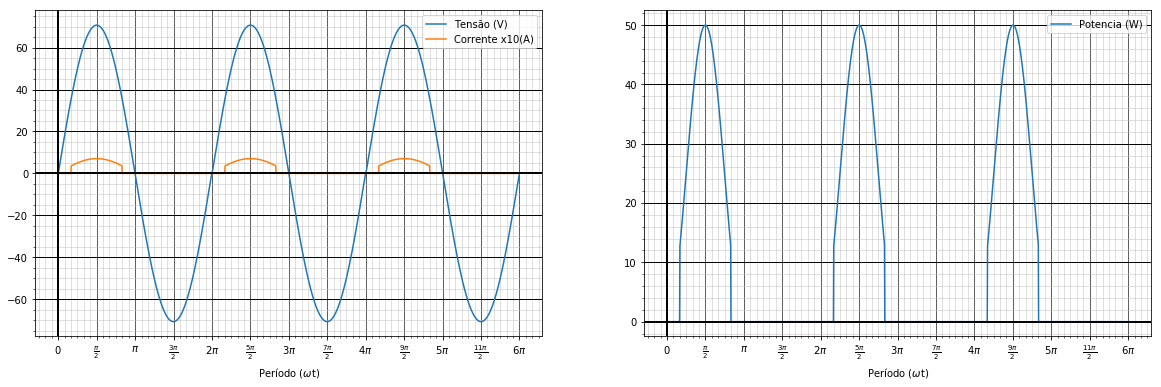

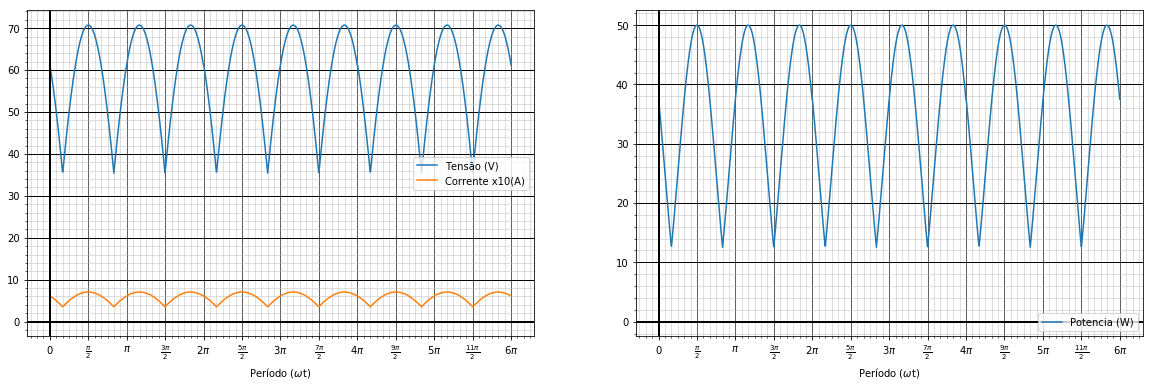

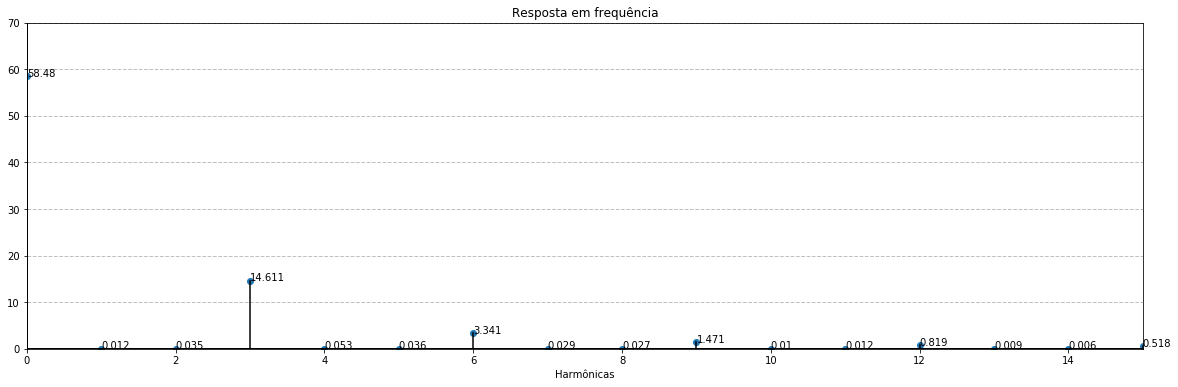

In [3]:
############# RETIFICADOR MEIA ONDA #############
#################### CARGA R ####################

V_pk = 50*sqrt(2)
R = 100

T = 2*pi
a = pi/6 #30º
b = 5*pi/6 #150º

# Tensão de saída do retificador trifásico com ponto médio
func_vout = f'{V_pk}*sin(x + {2*pi/3})*({degrau(0-eps, a)})'
func_vout = func_vout + f'+ {V_pk}*sin(x)*({degrau(a, b)})'
func_vout = func_vout + f'+ {V_pk}*sin(x - {2*pi/3})*({degrau(a+2*pi/3, b+2*pi/3)})'
func_vout = func_vout + f'+ {V_pk}*sin(x + {2*pi/3})*({degrau(a+4*pi/3, b+4*pi/3)})'

Vout_media = calculo_medio(func_vout)
Vout_rms = calculo_rms(func_vout)

# Corrente de saída do retificador trifásico com ponto médio
func_iout = '(' + func_vout + f')/{R}'
Iout_media = calculo_medio(func_iout)
Iout_rms = calculo_rms(func_iout)
I_pk = calculo_pk(func_iout)

# Tensão de entrada de uma fase do retificador trifásico com ponto médio
func_vin = f'{V_pk}*sin(x)'
Vin_media = calculo_medio(func_vin)
Vin_rms = calculo_rms(func_vin)

# Corrente de entrada de uma fase do retificador trifásico com ponto médio
func_iin = '(' + func_iout + f')*{degrau(a, b)}'
Iin_media = calculo_medio(func_iin)
Iin_rms = calculo_rms(func_iin)

# Potencia ativa e aparente da entrada do retificador trifásico com ponto médio
func_p = '(' + func_vin + ')*(' + func_iin + ')'
P = calculo_medio(func_p)
S = Iin_rms*V_pk/sqrt(2)
P_pk = calculo_pk(func_p)

FP = P/S
thdV = calculo_thd(func_vin, T)
thdI = calculo_thd(func_iin, T)

print("# - Tensão na carga - #"   , "\nVpk:\t"  , V_pk, "\nVm: \t"  , Vout_media, "\nVrms: \t", Vout_rms)
print("# - Corrente na carga - #" , "\nIpk: \t" , I_pk, "\nIm: \t"  , Iout_media, "\nIrms: \t", Iout_rms)
print("# - Potências - #"         , "\nPpk:\t"  , P_pk, "\nP: \t"   , P         , "\nS: \t"   , S)
print("# - Fatores - #"           , "\nFP:\t"   , FP  , "\nTHD V:\t", thdV      , "\nTHD I:\t", thdI)

plot_info(func_vin, func_iin, xlim=(0, T))
plot_info(func_vout, func_iout, xlim=(0, T))

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 6), sharey=True, sharex=True)
plot_fft(func_vout, ax2, T=2*np.pi, n_harmonicas = 15)